# Simple 1D Robust Design Example

This section defines an example objective function, then uses stochastic collocation to evaluate the output statistics (mean and standard deviation) as a function of the input standard deviation.  Don't worry about the details, the main purposes of this notebook is to create an animation for exploration.

In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi


def obj(x):

    coeff = [-0.1043, -0.2648, -0.2097, -1.8667, 2.3477, 2.9801, 2.8190]
    return np.polynomial.legendre.legval(2*x-1, coeff)


def stats(stdev, x):
    # compute mean and standard deviation using Gauss quadrature
    xq = [-2.35060497367, -1.33584907401, -0.436077411928, 0.436077411928, 1.33584907401, 2.35060497367]
    wq = [0.00453000990551, 0.157067320323, 0.724629595224, 0.724629595224, 0.157067320323, 0.00453000990551]
    
    nx = len(x)
    nq = len(xq)
    mu = np.zeros(nx)
    sigma = np.zeros(nx)
    
    for i in range(nx):
        mu[i] = 0.0
        sigma[i] = 0.0
        
        for j in range(nq):
            fnc = obj(sqrt(2)*stdev*xq[j]+x[i])
            mu[i] += wq[j]*fnc
            sigma[i] += wq[j]*fnc*fnc

        mu[i] = mu[i]/sqrt(pi)
        sigma[i] = sqrt(sigma[i]/sqrt(pi) - mu[i]*mu[i]);


    return mu, sigma



This animation allows you to change the input standard deviation and observe the mean performance of the function.  It also shows the Gaussian distribution corresponding to the input $x$ located at the optimal $x$ just to give you a feel for what the standard deviation looks like.

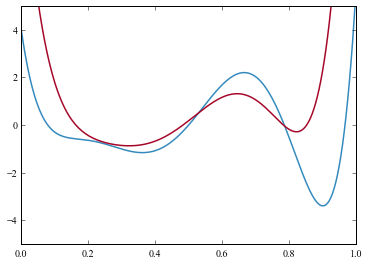

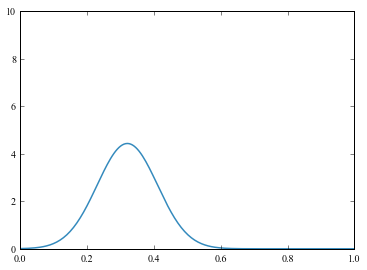

None

In [25]:
x = np.linspace(0, 1, 200)
y = obj(x)

from ipywidgets import interact
from scipy.stats.distributions import norm


@interact(stdev=(0.01, 0.2, 0.01))
def variability(stdev):


    ym, ys = stats(stdev, x)


    plt.figure()
    plt.plot(x, y)
    plt.plot(x, ym)
    plt.ylim([-5, 5])
    
    imin = np.argmin(ym)
    xmin = x[imin]
    yn = norm.pdf(x, loc=xmin, scale=stdev)

    plt.figure()
    plt.plot(x, yn)
    plt.ylim([0, 10])
    plt.show()